<a href="https://colab.research.google.com/github/ardiantutomo/simple-cnn-mnist/blob/master/Simple_CNN_for_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Training data count: {}'.format(x_train.shape[0]))
print('Testing data count: {}'.format(x_test.shape[0]))

Training data count: 60000
Testing data count: 10000


# **Print Image**

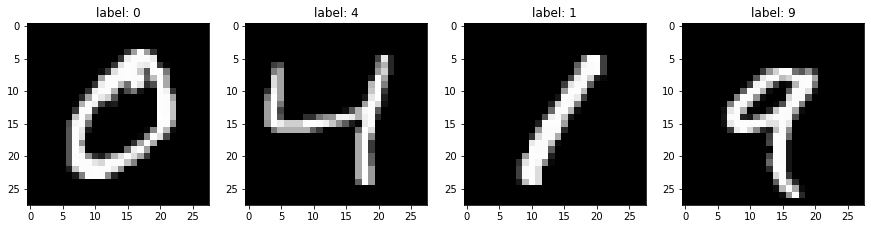

In [2]:
from matplotlib import pyplot as plt

fig=plt.figure(figsize=(15, 15))
columns = 4
rows = 1

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    ax.title.set_text('label: {}'.format(y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
plt.show()


# **Pre-processing**

In [14]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Using Sklearn**

In [0]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(-1, 1)
y_train = encoder.fit_transform(y_train)

y_test = y_test.reshape(-1, 1)
y_test = encoder.fit_transform(y_test)

**Using Keras**

In [0]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# **The Model**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 222us/step - loss: 0.4726 - accuracy: 0.9269 - val_loss: 0.1228 - val_accuracy: 0.9643
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0910 - accuracy: 0.9726 - val_loss: 0.0935 - val_accuracy: 0.9722
Epoch 3/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0708 - accuracy: 0.9787 - val_loss: 0.1246 - val_accuracy: 0.9694
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0557 - accuracy: 0.9828 - val_loss: 0.0999 - val_accuracy: 0.9746
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0462 - accuracy: 0.9858 - val_loss: 0.1193 - val_accuracy: 0.9736
Epoch 6/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0363 - accuracy: 0.9882 - val_loss: 0.1295 - val_accuracy: 0.9741
Epoch 7/10
60000/60000 [==============================] - 7s 

**PLOT**

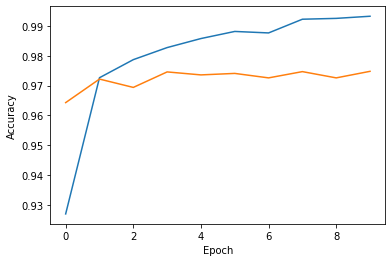

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# **Prediction**

[[1.3134041e-35 9.6667505e-37 2.0404869e-22 1.3744224e-18 0.0000000e+00
  7.7984221e-36 0.0000000e+00 1.0000000e+00 2.0542512e-19 4.9599704e-20]
 [1.0171525e-09 1.6049381e-19 1.0000000e+00 5.3275393e-23 1.4655351e-24
  5.7724496e-32 6.5333600e-10 2.9348320e-27 1.9600466e-18 3.0677906e-35]
 [8.5166705e-29 1.0000000e+00 3.0584352e-25 4.7909353e-32 7.4711761e-20
  3.5425176e-18 8.1344627e-18 1.0525305e-22 9.6783192e-18 3.4502791e-18]]


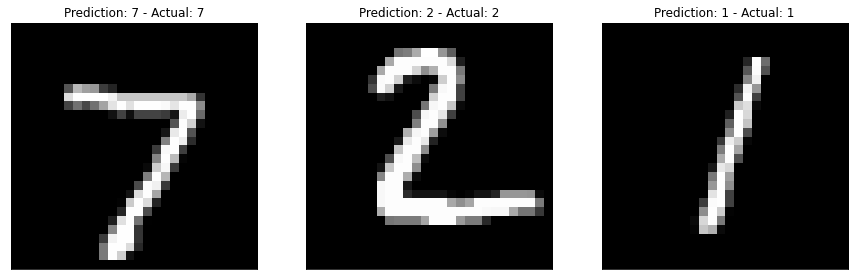

In [37]:
prediction = model.predict(x_test[:3])
print(prediction)
import numpy as np

w=60
h=40
fig=plt.figure(figsize=(15, 15))
columns = 3
rows = 1
for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)

    plt.xticks([], [])
    plt.yticks([], [])
    actual_label = np.argmax(y_test[i-1])
    prediction_label = np.argmax(prediction[i-1])
    ax.title.set_text('Prediction: {} - Actual: {}'.format(prediction_label, actual_label))
    image = x_test[i-1].reshape((28,28))
    plt.imshow(image, cmap='gray')
plt.show()
